# t-Distributed Stochastic Neighbor Embedding Visualization

In [3]:
from __future__ import print_function, division
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

## Define the centers of each Gaussian cloud

In [4]:
centers = np.array([
            [ 1,  1,  1],
            [ 1,  1, -1],
            [ 1, -1,  1],
            [ 1, -1, -1],
            [-1,  1,  1],
            [-1,  1, -1],
            [-1, -1,  1],
            [-1, -1, -1]])*3

## Create the clouds, Gaussian samples centered at each of the centers we just made

In [9]:
data = []
pts_per_cloud = 100
for c in centers:
    cloud = np.random.randn(pts_per_cloud, 3) + c
    data.append(cloud)
data = np.concatenate(data)

## Visualize the clouds in 3-D add colors / labels so we can track where the points go

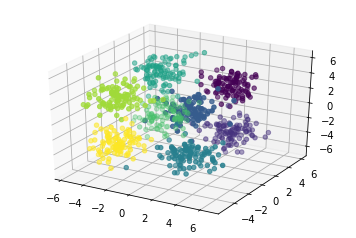

In [10]:
colors = np.array([[i]*pts_per_cloud for i in range(len(centers))]).flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=colors)
plt.show()

## Perform dimensionality reduction

In [11]:
tsne = TSNE()
transformed = tsne.fit_transform(data)

## Visualize the clouds in 2-D

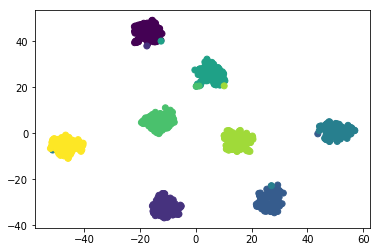

In [12]:
plt.scatter(transformed[:,0], transformed[:,1], c=colors)
plt.show()

So here we've reduced a 3-D plot into 2-D.

# t-SNE on the Donut

## Function to gather data for the 'donut' distribution

In [23]:
def get_donut_data():
    N = 600
    R_inner = 10
    R_outer = 20

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(300) + R_inner
    theta = 2*np.pi*np.random.random(300)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T
    #300 comes from N/2
    R2 = np.random.randn(300) + R_outer
    theta = 2*np.pi*np.random.random(300)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(300) + [1]*(300))
    return X, Y

## Define the X and y variables.

In [24]:
X, Y = get_donut_data()

## Display the data

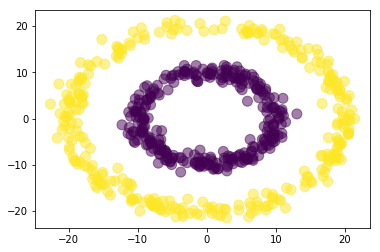

In [25]:
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

## Dimensionality reduction

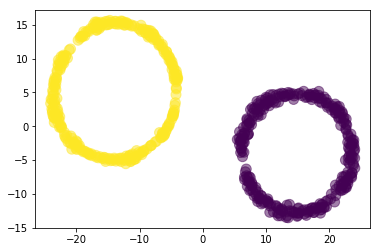

In [26]:
tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# t-SNE on XOR

## Function to get the XOR dataset

In [27]:
def get_xor_data():
    X1 = np.random.random((100, 2))
    X2 = np.random.random((100, 2)) - np.array([1, 1])
    X3 = np.random.random((100, 2)) - np.array([1, 0])
    X4 = np.random.random((100, 2)) - np.array([0, 1])
    X = np.vstack((X1, X2, X3, X4))
    Y = np.array([0]*200 + [1]*200)
    return X, Y

## Define the X and y variables

In [28]:
X, Y = get_xor_data()

## View the 2D 'Checkerboard' Plot

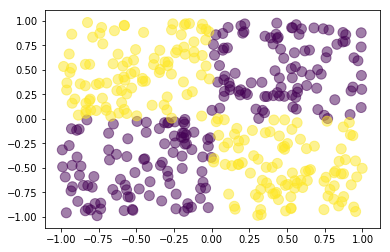

In [29]:
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

## Dimensionality reduction

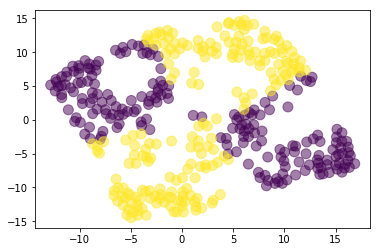

In [38]:
tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

It doesn't look like much has happened here, but to t-SNE, the data was unlabeled and uncategorized, and the distances were uniformly distributed. The fact that the result is similar is demonstration of the abilities of the t-SNE method.

# t-SNE on MNIST

Import the dataset, assign the appropriate variables, and view the plot.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from util import getKaggleMNIST
import os
import sys

In [2]:
Xtrain, Ytrain, _, _ = getKaggleMNIST()

In [3]:
sample_size = 1000
X = Xtrain[:sample_size]
Y = Ytrain[:sample_size]

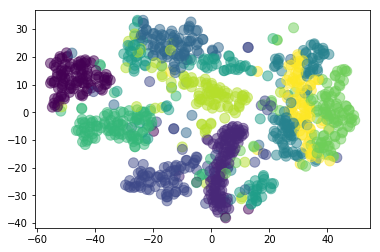

In [4]:
tsne = TSNE()
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

Here we see that the data has been categorized and is easier to view when compared to the the PCA. Although this model can't be applied to new data, it is still a great classification using a completely unsupervised method.